# Data Cleaning and Preparation for BMI 6114 Final Project
Data Source: https://www.cbioportal.org/study/summary?id=nsclc_tcga_broad_2016

Desired Features:
- Gene Mutation Status (data_mutations.txt)
- Copy Number Variation (data_cna.txt)
- Smoking Status (data_clinical_patient.txt)

Desired Target:
- Overall Survival (Months)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Clinical Data Cleaning

In [2]:
raw_clinical_data = pd.read_csv('../data/nsclc_tcga_broad_2016/data_clinical_patient.txt', sep = '\t', header = 4)
raw_clinical_data.shape, raw_clinical_data.columns

((1144, 15),
 Index(['PATIENT_ID', 'AGE', 'SEX', 'SMOKING_HISTORY', 'SMOKING_PACK_YEARS',
        'STAGE', 'M_STAGE', 'N_STAGE', 'DAYS_TO_DEATH', 'DAYS_TO_LAST_FOLLOWUP',
        'OS_MONTHS', 'OS_STATUS', 'HISTORY_OTHER_MALIGNANCY',
        'HISTORY_NEOADJUVANT_TRTYN', 'AGE_AT_SURGERY'],
       dtype='object'))

*Removing Samples with no OS_MONTHS data*

In [3]:
clinical_data = raw_clinical_data[~raw_clinical_data['OS_MONTHS'].isna()]
raw_clinical_data.shape, clinical_data.shape

((1144, 15), (954, 15))

*Remove samples that have NO smoking history AND NO smoking pack years*

In [4]:
# Find rows where both SMOKING_HISTORY and SMOKING_PACK_YEARS are NaN
nan_rows = clinical_data[clinical_data['SMOKING_HISTORY'].isna() & clinical_data['SMOKING_PACK_YEARS'].isna()]

# Display the rows
nan_rows.tail(20)

,PATIENT_ID,AGE,SEX,SMOKING_HISTORY,SMOKING_PACK_YEARS,STAGE,M_STAGE,N_STAGE,DAYS_TO_DEATH,DAYS_TO_LAST_FOLLOWUP,OS_MONTHS,OS_STATUS,HISTORY_OTHER_MALIGNANCY,HISTORY_NEOADJUVANT_TRTYN,AGE_AT_SURGERY
282,TCGA-50-5049,70.0,Male,NaN,NaN,IA,M0,N0,NaN,1485.0,48.80,0:LIVING,No,No,NaN
284,TCGA-50-5055,79.0,Female,NaN,NaN,IIA,M0,N1,NaN,785.0,25.80,0:LIVING,No,No,NaN
286,TCGA-50-5068,59.0,Female,NaN,NaN,IIB,Mx,N1,1499.0,1499.0,49.30,1:DECEASED,No,No,NaN
288,TCGA-50-5930,47.0,Male,NaN,NaN,IIIA,M0,N2,282.0,282.0,9.30,1:DECEASED,No,No,NaN
290,TCGA-50-5932,75.0,Male,NaN,NaN,IIB,M0,N1,1235.0,1091.0,40.60,1:DECEASED,"Yes, history of prior malignancy",No,NaN
291,TCGA-50-5933,72.0,Male,NaN,NaN,IIIB,M0,N2,2393.0,2370.0,78.00,1:DECEASED,No,No,NaN
292,TCGA-50-5935,86.0,Female,NaN,NaN,IA,M0,N0,653.0,653.0,21.50,1:DECEASED,"Yes, history of prior malignancy",No,NaN
293,TCGA-50-5936,58.0,Male,NaN,NaN,IIIA,M0,N2,257.0,NaN,8.50,1:DECEASED,No,No,NaN
297,TCGA-50-5944,69.0,Female,NaN,NaN,IA,M0,N0,NaN,373.0,12.30,0:LIVING,No,No,NaN
310,TCGA-50-8460,74.0,Male,NaN,NaN,IA,M0,N0,NaN,105.0,3.50,0:LIVING,No,No,NaN


In [5]:
clinical_data = clinical_data[~(clinical_data['SMOKING_HISTORY'].isna() & clinical_data['SMOKING_PACK_YEARS'].isna())]
clinical_data.shape

(931, 15)

**Filter to necessary columns**

In [6]:
clinical_data = clinical_data[['PATIENT_ID', 'SMOKING_HISTORY', 'SMOKING_PACK_YEARS', 'OS_MONTHS']]
clinical_data.head()

,PATIENT_ID,SMOKING_HISTORY,SMOKING_PACK_YEARS,OS_MONTHS
159,TCGA-05-4244,Current Reformed Smoker For < Or = 15 Years,38.0,0.0
160,TCGA-05-4249,Current Reformed Smoker For > 15 Years,52.0,38.1
161,TCGA-05-4250,Current Reformed Smoker For < Or = 15 Years,47.0,4.0
162,TCGA-05-4382,Current Reformed Smoker For < Or = 15 Years,62.0,20.0
163,TCGA-05-4384,Current Reformed Smoker For > 15 Years,20.0,14.0


*Imputing missing smoking data using the mean based on categorical SMOKING_HISTORY*

In [7]:
imputation_dict = {}

for val in clinical_data['SMOKING_HISTORY'].unique():
    if val not in imputation_dict:
        imputation_dict[val] = clinical_data.loc[clinical_data['SMOKING_HISTORY'] == val, 'SMOKING_PACK_YEARS'].mean()

imputation_dict

{'Current Reformed Smoker For < Or = 15 Years': np.float64(51.14860169491525),
 'Current Reformed Smoker For > 15 Years': np.float64(35.489939024390246),
 'Current Smoker': np.float64(53.414320388349516),
 'Lifelong Non-Smoker': np.float64(0.0),
 'Current Reformed Smoker, Duration Not Specified ': np.float64(45.0)}

In [8]:
for i in range(clinical_data.shape[0]):
    if clinical_data.iloc[i]['SMOKING_PACK_YEARS'] is np.nan:
        smoking_history = clinical_data.iloc[i]['SMOKING_HISTORY']
        print(smoking_history)
        if smoking_history in imputation_dict:
            clinical_data.at[clinical_data.index[i], 'SMOKING_PACK_YEARS'] = imputation_dict[smoking_history]

In [9]:
# Replace NaN values in SMOKING_PACK_YEARS using imputation_dict based on SMOKING_HISTORY
clinical_data['SMOKING_PACK_YEARS'] = clinical_data.apply(
    lambda row: imputation_dict[row['SMOKING_HISTORY']] if pd.isna(row['SMOKING_PACK_YEARS']) and row['SMOKING_HISTORY'] in imputation_dict else row['SMOKING_PACK_YEARS'],
    axis=1
)

# Check the number of remaining NaN values in SMOKING_PACK_YEARS
clinical_data['SMOKING_PACK_YEARS'].isna().sum()

np.int64(0)

*One Hot Encoding for Smoking Status*

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
clinical_data['SMOKING_HISTORY'].unique()

array(['Current Reformed Smoker For < Or = 15 Years',
       'Current Reformed Smoker For > 15 Years', 'Current Smoker',
       'Lifelong Non-Smoker',
       'Current Reformed Smoker, Duration Not Specified '], dtype=object)

In [12]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

# Fit and transform the SMOKING_HISTORY column
smoking_history_encoded = encoder.fit_transform(clinical_data[['SMOKING_HISTORY']])

#Create a DataFrame with the encoded column names
encoded_columns = pd.DataFrame(
    smoking_history_encoded, 
    columns=encoder.get_feature_names_out(['SMOKING_HISTORY']),
    index=clinical_data.index
)

#smoking_history_encoded
#encoded_columns
#Concatenate the encoded columns with the original DataFrame
clinical_data = pd.concat([clinical_data, encoded_columns], axis=1)

#Drop the original SMOKING_HISTORY column if no longer needed
clinical_data = clinical_data.drop(columns=['SMOKING_HISTORY'])

#Display the updated DataFrame
clinical_data.head()

,PATIENT_ID,SMOKING_PACK_YEARS,OS_MONTHS,SMOKING_HISTORY_Current Reformed Smoker For < Or = 15 Years,SMOKING_HISTORY_Current Reformed Smoker For > 15 Years,"SMOKING_HISTORY_Current Reformed Smoker, Duration Not Specified",SMOKING_HISTORY_Current Smoker,SMOKING_HISTORY_Lifelong Non-Smoker
159,TCGA-05-4244,38.0,0.0,1.0,0.0,0.0,0.0,0.0
160,TCGA-05-4249,52.0,38.1,0.0,1.0,0.0,0.0,0.0
161,TCGA-05-4250,47.0,4.0,1.0,0.0,0.0,0.0,0.0
162,TCGA-05-4382,62.0,20.0,1.0,0.0,0.0,0.0,0.0
163,TCGA-05-4384,20.0,14.0,0.0,1.0,0.0,0.0,0.0


In [13]:
clinical_data.to_csv('../data/nsclc_tcga_broad_2016/filtered_clinical_data.csv', index = False)

In [14]:
clinical_data_ids = clinical_data['PATIENT_ID'].values
clinical_data_ids[:10]

array(['TCGA-05-4244', 'TCGA-05-4249', 'TCGA-05-4250', 'TCGA-05-4382',
       'TCGA-05-4384', 'TCGA-05-4389', 'TCGA-05-4390', 'TCGA-05-4395',
       'TCGA-05-4396', 'TCGA-05-4397'], dtype=object)

In [15]:
len(np.unique(clinical_data_ids))

931

## Linking Sample ID with Patient ID

In [16]:
raw_sample_data = pd.read_csv("../data/nsclc_tcga_broad_2016/data_clinical_sample.txt", sep = '\t', header = 4)

In [17]:
raw_sample_data.head()

,PATIENT_ID,SAMPLE_ID,T_STAGE,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,SOMATIC_STATUS,TMB_NONSYNONYMOUS
0,LUAD-2GUGK,LUAD-2GUGK-Tumor,NaN,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Matched,7.933333
1,LUAD-5O6B5,LUAD-5O6B5-Tumor,NaN,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Matched,1.033333
2,LUAD-5V8LT,LUAD-5V8LT-Tumor,NaN,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Matched,49.433333
3,LUAD-74TBW,LUAD-74TBW-Tumor,NaN,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Matched,7.800000
4,LUAD-AEIUF,LUAD-AEIUF-Tumor,NaN,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Matched,5.333333


In [18]:
# Filter raw_sample_data by PATIENT_ID and reindex to match clinical_data_ids order
sample_data = raw_sample_data[raw_sample_data['PATIENT_ID'].isin(clinical_data_ids)]
sample_data = sample_data.set_index('PATIENT_ID').reindex(clinical_data_ids).reset_index()

# Display the filtered and ordered DataFrame
sample_data.head()

,PATIENT_ID,SAMPLE_ID,T_STAGE,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,SOMATIC_STATUS,TMB_NONSYNONYMOUS
0,TCGA-05-4244,TCGA-05-4244-01A-01D-1105-08,T2,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Matched,6.300000
1,TCGA-05-4249,TCGA-05-4249-01A-01D-1105-08,T2,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Matched,9.633333
2,TCGA-05-4250,TCGA-05-4250-01A-01D-1105-08,T3,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Matched,9.833333
3,TCGA-05-4382,TCGA-05-4382-01A-01D-1931-08,T2,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Matched,54.233333
4,TCGA-05-4384,TCGA-05-4384-01A-01D-1753-08,T2,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Matched,4.066667


In [19]:
sample_data = sample_data[['PATIENT_ID', 'SAMPLE_ID', 'ONCOTREE_CODE']]

In [20]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

# Fit and transform the SMOKING_HISTORY column
oncotree_encoded = encoder.fit_transform(sample_data[['ONCOTREE_CODE']])

#Create a DataFrame with the encoded column names
encoded_columns = pd.DataFrame(
    oncotree_encoded, 
    columns=encoder.get_feature_names_out(['ONCOTREE_CODE']),
    index=sample_data.index
)

#Concatenate the encoded columns with the original DataFrame
sample_data = pd.concat([sample_data, encoded_columns], axis=1)

#Drop the original SMOKING_HISTORY column if no longer needed
sample_data = sample_data.drop(columns=['ONCOTREE_CODE']) 
#Display the updated DataFrame
sample_data.head()

,PATIENT_ID,SAMPLE_ID,ONCOTREE_CODE_LUAD,ONCOTREE_CODE_LUSC
0,TCGA-05-4244,TCGA-05-4244-01A-01D-1105-08,1.0,0.0
1,TCGA-05-4249,TCGA-05-4249-01A-01D-1105-08,1.0,0.0
2,TCGA-05-4250,TCGA-05-4250-01A-01D-1105-08,1.0,0.0
3,TCGA-05-4382,TCGA-05-4382-01A-01D-1931-08,1.0,0.0
4,TCGA-05-4384,TCGA-05-4384-01A-01D-1753-08,1.0,0.0


In [21]:
sample_data.to_csv('../data/nsclc_tcga_broad_2016/filtered_sample_data.csv', index = False)

**Merge Clinical and Sample Data: Drop PATIENT_ID in favor of SAMPLE_ID**

In [22]:
# Merge clinical_data and sample_data on the PATIENT_ID column
merged_clin_sample_data = pd.merge(clinical_data, sample_data, on='PATIENT_ID', how='inner')

# Drop the PATIENT_ID column
merged_clin_sample_data = merged_clin_sample_data.drop(columns=['PATIENT_ID'])

# Display the merged DataFrame
merged_clin_sample_data.head()

,SMOKING_PACK_YEARS,OS_MONTHS,SMOKING_HISTORY_Current Reformed Smoker For < Or = 15 Years,SMOKING_HISTORY_Current Reformed Smoker For > 15 Years,"SMOKING_HISTORY_Current Reformed Smoker, Duration Not Specified",SMOKING_HISTORY_Current Smoker,SMOKING_HISTORY_Lifelong Non-Smoker,SAMPLE_ID,ONCOTREE_CODE_LUAD,ONCOTREE_CODE_LUSC
0,38.0,0.0,1.0,0.0,0.0,0.0,0.0,TCGA-05-4244-01A-01D-1105-08,1.0,0.0
1,52.0,38.1,0.0,1.0,0.0,0.0,0.0,TCGA-05-4249-01A-01D-1105-08,1.0,0.0
2,47.0,4.0,1.0,0.0,0.0,0.0,0.0,TCGA-05-4250-01A-01D-1105-08,1.0,0.0
3,62.0,20.0,1.0,0.0,0.0,0.0,0.0,TCGA-05-4382-01A-01D-1931-08,1.0,0.0
4,20.0,14.0,0.0,1.0,0.0,0.0,0.0,TCGA-05-4384-01A-01D-1753-08,1.0,0.0


## Mutation Data Cleaning

In [23]:
raw_mut_data = pd.read_csv("../data/nsclc_tcga_broad_2016/data_mutations.txt", sep = '\t', header = 1)

/tmp/ipykernel_3119/2242576961.py:1: DtypeWarning: Columns (64,78,87,101,105,111,123,136,150,174,176,206) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_mut_data = pd.read_csv("../data/nsclc_tcga_broad_2016/data_mutations.txt", sep = '\t', header = 1)


In [24]:
raw_mut_data.shape

(393371, 215)

In [25]:
raw_mut_data.columns[:30]

Index(['Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build', 'Chromosome',
       'Start_Position', 'End_Position', 'Strand', 'Consequence',
       'Variant_Classification', 'Variant_Type', 'Reference_Allele',
       'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'dbSNP_RS',
       'dbSNP_Val_Status', 'Tumor_Sample_Barcode',
       'Matched_Norm_Sample_Barcode', 'Match_Norm_Seq_Allele1',
       'Match_Norm_Seq_Allele2', 'Tumor_Validation_Allele1',
       'Tumor_Validation_Allele2', 'Match_Norm_Validation_Allele1',
       'Match_Norm_Validation_Allele2', 'Verification_Status',
       'Validation_Status', 'Mutation_Status', 'Sequencing_Phase',
       'Sequence_Source', 'Validation_Method'],
      dtype='object')

In [26]:
mut_data = raw_mut_data[['Hugo_Symbol', 'Tumor_Sample_Barcode']]

**Restricting to the 500 most commonly mutated genes to reduce the size of the matrix**

In [ ]:
# Step 1: Get top 500 Hugo_Symbols
top_symbols = mut_data['Hugo_Symbol'].value_counts().nlargest(500).index

# Step 2: Create a binary column to indicate mutation presence
mut_data['present'] = 1

# Step 3: Pivot the full data (will only get entries that exist)
pivot_table = pd.pivot_table(
    mut_data[mut_data['Hugo_Symbol'].isin(top_symbols)],
    values='present',
    index='Tumor_Sample_Barcode',
    columns='Hugo_Symbol',
    fill_value=0,
    aggfunc='max'  # In case of duplicates
)

# Step 4: Ensure all Tumor_Sample_Barcodes are included
# Create a complete index of all barcodes
all_barcodes = mut_data['Tumor_Sample_Barcode'].unique()
pivot_table = pivot_table.reindex(all_barcodes, fill_value=0)

# Optional: sort columns if needed
pivot_table = pivot_table.reindex(sorted(pivot_table.columns), axis=1)

# Final result: pivot_table


/tmp/ipykernel_3119/2285406232.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mut_data['present'] = 1


In [28]:
mut_data = pivot_table
mut_data.shape

(1144, 500)

*Combining mut_data with merged_clin_sample_data*

In [36]:
# Filter mut_data to include only rows where the index matches SAMPLE_ID in merged_clin_sample_data
intersected_data = mut_data[mut_data.index.isin(merged_clin_sample_data['SAMPLE_ID'])]

# Optionally, reindex mut_data to match the order of SAMPLE_ID in merged_clin_sample_data
intersected_data = intersected_data.reindex(merged_clin_sample_data['SAMPLE_ID'])

# Display the intersected data
intersected_data.head()

Hugo_Symbol,ABCA13,ABCA9,ABCB1,ABCB5,ACACB,ACAN,ACTN2,ADAMTS12,ADAMTS16,ADAMTS18,...,ZNF423,ZNF479,ZNF521,ZNF536,ZNF676,ZNF716,ZNF804A,ZNF804B,ZNF831,ZP4
SAMPLE_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01A-01D-1105-08,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
TCGA-05-4249-01A-01D-1105-08,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
TCGA-05-4250-01A-01D-1105-08,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
TCGA-05-4382-01A-01D-1931-08,0,1,0,1,1,0,0,1,0,1,...,1,0,1,1,1,0,1,0,1,1
TCGA-05-4384-01A-01D-1753-08,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [37]:
all(merged_clin_sample_data['SAMPLE_ID'] == intersected_data.index)

True

In [38]:
# Set SAMPLE_ID as index for proper alignment
merged_clin_sample_data_indexed = merged_clin_sample_data.set_index('SAMPLE_ID')

# Now concat using index alignment
merged_clin_sample_mut_data = pd.concat([merged_clin_sample_data_indexed, intersected_data], axis=1)

In [39]:
merged_clin_sample_mut_data.head()

,SMOKING_PACK_YEARS,OS_MONTHS,SMOKING_HISTORY_Current Reformed Smoker For < Or = 15 Years,SMOKING_HISTORY_Current Reformed Smoker For > 15 Years,"SMOKING_HISTORY_Current Reformed Smoker, Duration Not Specified",SMOKING_HISTORY_Current Smoker,SMOKING_HISTORY_Lifelong Non-Smoker,ONCOTREE_CODE_LUAD,ONCOTREE_CODE_LUSC,ABCA13,...,ZNF423,ZNF479,ZNF521,ZNF536,ZNF676,ZNF716,ZNF804A,ZNF804B,ZNF831,ZP4
SAMPLE_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01A-01D-1105-08,38.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,...,1,0,0,0,1,0,0,0,0,0
TCGA-05-4249-01A-01D-1105-08,52.0,38.1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
TCGA-05-4250-01A-01D-1105-08,47.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0
TCGA-05-4382-01A-01D-1931-08,62.0,20.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,...,1,0,1,1,1,0,1,0,1,1
TCGA-05-4384-01A-01D-1753-08,20.0,14.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,...,0,0,0,0,0,0,1,1,0,0


## Copy Number Alteration Cleaning

In [40]:
raw_cna_data = pd.read_csv("../data/nsclc_tcga_broad_2016/data_cna.txt", sep = '\t', header = 0)

In [41]:
raw_cna_data.head()

,Hugo_Symbol,Entrez_Gene_Id,TCGA-33-AASD-01A-11D-A401-08,TCGA-33-AASL-01A-11D-A401-08,TCGA-NK-A7XE-01A-12D-A401-08,TCGA-XC-AA0X-01A-32D-A401-08,TCGA-33-AASI-01A-22D-A401-08,TCGA-33-AASJ-01A-11D-A401-08,TCGA-6A-AB49-01A-12D-A401-08,TCGA-33-AAS8-01A-11D-A401-08,...,LUAD-S01302-Tumor,LUAD-S01409-Tumor,LUAD-S01345-Tumor,LUAD-S01306-Tumor,LUAD-S01354-Tumor,LUAD-S01346-Tumor,LUAD-S00486-Tumor,LUAD-S00488-Tumor,LUAD-S01407-Tumor,LUAD-S00484-Tumor
0,ACAP3,116983.0,0,-1,0,0,-1,0,0,-1,...,1,2,0,0,0,1,-1,-1,1,0
1,ACTRT2,140625.0,0,-1,0,0,-1,0,0,-1,...,1,2,0,0,0,1,-1,-1,1,0
2,AGRN,375790.0,0,-1,0,0,-1,0,0,-1,...,1,2,0,0,0,1,-1,-1,1,0
3,ANKRD65,441869.0,0,-1,0,0,-1,0,0,-1,...,1,2,0,0,0,1,-1,-1,1,0
4,ATAD3A,55210.0,0,-1,0,0,-1,0,0,-1,...,1,2,0,0,0,1,-1,-1,1,0


In [42]:
cna_data = raw_cna_data.drop(['Entrez_Gene_Id'], axis = 1)
cna_data.head()

,Hugo_Symbol,TCGA-33-AASD-01A-11D-A401-08,TCGA-33-AASL-01A-11D-A401-08,TCGA-NK-A7XE-01A-12D-A401-08,TCGA-XC-AA0X-01A-32D-A401-08,TCGA-33-AASI-01A-22D-A401-08,TCGA-33-AASJ-01A-11D-A401-08,TCGA-6A-AB49-01A-12D-A401-08,TCGA-33-AAS8-01A-11D-A401-08,TCGA-LA-A7SW-01A-11D-A401-08,...,LUAD-S01302-Tumor,LUAD-S01409-Tumor,LUAD-S01345-Tumor,LUAD-S01306-Tumor,LUAD-S01354-Tumor,LUAD-S01346-Tumor,LUAD-S00486-Tumor,LUAD-S00488-Tumor,LUAD-S01407-Tumor,LUAD-S00484-Tumor
0,ACAP3,0,-1,0,0,-1,0,0,-1,1,...,1,2,0,0,0,1,-1,-1,1,0
1,ACTRT2,0,-1,0,0,-1,0,0,-1,1,...,1,2,0,0,0,1,-1,-1,1,0
2,AGRN,0,-1,0,0,-1,0,0,-1,1,...,1,2,0,0,0,1,-1,-1,1,0
3,ANKRD65,0,-1,0,0,-1,0,0,-1,1,...,1,2,0,0,0,1,-1,-1,1,0
4,ATAD3A,0,-1,0,0,-1,0,0,-1,1,...,1,2,0,0,0,1,-1,-1,1,0


In [43]:
cna_data.shape

(24203, 1145)

In [44]:
# Set Hugo_Symbol as the index so it becomes the column names after transpose
cna_t = cna_data.set_index('Hugo_Symbol').T

cna_t.head()


Hugo_Symbol,ACAP3,ACTRT2,AGRN,ANKRD65,ATAD3A,ATAD3B,ATAD3C,AURKAIP1,B3GALT6,C1orf159,...,SNORA36A,SNORA56,TMLHE,VBP1,hsa-mir-1184-1,hsa-mir-1184-2,hsa-mir-1184-3,IL9R,SPRY3,VAMP7
TCGA-33-AASD-01A-11D-A401-08,0,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
TCGA-33-AASL-01A-11D-A401-08,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
TCGA-NK-A7XE-01A-12D-A401-08,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
TCGA-XC-AA0X-01A-32D-A401-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-33-AASI-01A-22D-A401-08,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [45]:
sum(top_symbols.isin(cna_t.columns))

np.int64(481)

In [46]:
# Filter columns in cna_t that are in top_symbols
cna_t = cna_t.loc[:, cna_t.columns.isin(top_symbols)]
print(cna_t.shape)

cna_t = cna_t.rename(columns = lambda col: f"CNA_{col}")

cna_t.head()

(1144, 481)


Hugo_Symbol,CNA_CHD5,CNA_PTCHD2,CNA_VPS13D,CNA_UBR4,CNA_HSPG2,CNA_ARID1A,CNA_CSMD2,CNA_MACF1,CNA_LRRC7,CNA_C1orf173,...,CNA_PCDH11X,CNA_COL4A5,CNA_DCAF12L2,CNA_DCAF12L1,CNA_GPR112,CNA_MAGEC1,CNA_SLITRK2,CNA_AFF2,CNA_FLNA,CNA_F8
TCGA-33-AASD-01A-11D-A401-08,0,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
TCGA-33-AASL-01A-11D-A401-08,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
TCGA-NK-A7XE-01A-12D-A401-08,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
TCGA-XC-AA0X-01A-32D-A401-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-33-AASI-01A-22D-A401-08,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [47]:
# Step 1: Find common indices
common_indices = cna_t.index.intersection(merged_clin_sample_mut_data.index)

# Step 2: Filter cna_t to include only rows with common indices
filtered_cna_t = cna_t.loc[common_indices]

# Step 3: Filter merged_clin_sample_mut_data to include only rows with common indices (optional)
filtered_clin_sample_mut_data = merged_clin_sample_mut_data.loc[common_indices]

# Step 4: Merge the filtered DataFrames
merged_clin_sample_mut_cna_data = pd.concat([filtered_clin_sample_mut_data, filtered_cna_t], axis=1)

# Display the resulting DataFrame
print(merged_clin_sample_mut_cna_data.shape)
merged_clin_sample_mut_cna_data.tail()

(931, 990)


,SMOKING_PACK_YEARS,OS_MONTHS,SMOKING_HISTORY_Current Reformed Smoker For < Or = 15 Years,SMOKING_HISTORY_Current Reformed Smoker For > 15 Years,"SMOKING_HISTORY_Current Reformed Smoker, Duration Not Specified",SMOKING_HISTORY_Current Smoker,SMOKING_HISTORY_Lifelong Non-Smoker,ONCOTREE_CODE_LUAD,ONCOTREE_CODE_LUSC,ABCA13,...,CNA_PCDH11X,CNA_COL4A5,CNA_DCAF12L2,CNA_DCAF12L1,CNA_GPR112,CNA_MAGEC1,CNA_SLITRK2,CNA_AFF2,CNA_FLNA,CNA_F8
TCGA-44-6775-01A-11D-1855-08,25.000000,2.7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-44-6146-01A-11D-1753-08,15.000000,9.9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
TCGA-44-6147-01A-11D-1753-08,35.489939,7.8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-44-2662-01A-01D-0969-08,56.000000,15.8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
TCGA-44-2668-01A-01D-0969-08,60.000000,8.1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Move a specific column (e.g., 'column_name') to the end
column_to_move = 'OS_MONTHS'
merged_clin_sample_mut_cna_data = merged_clin_sample_mut_cna_data[[col for col in merged_clin_sample_mut_cna_data.columns if col != column_to_move] + [column_to_move]]

In [49]:
merged_clin_sample_mut_cna_data.columns

Index(['SMOKING_PACK_YEARS',
       'SMOKING_HISTORY_Current Reformed Smoker For < Or = 15 Years',
       'SMOKING_HISTORY_Current Reformed Smoker For > 15 Years',
       'SMOKING_HISTORY_Current Reformed Smoker, Duration Not Specified ',
       'SMOKING_HISTORY_Current Smoker', 'SMOKING_HISTORY_Lifelong Non-Smoker',
       'ONCOTREE_CODE_LUAD', 'ONCOTREE_CODE_LUSC', 'ABCA13', 'ABCA9',
       ...
       'CNA_COL4A5', 'CNA_DCAF12L2', 'CNA_DCAF12L1', 'CNA_GPR112',
       'CNA_MAGEC1', 'CNA_SLITRK2', 'CNA_AFF2', 'CNA_FLNA', 'CNA_F8',
       'OS_MONTHS'],
      dtype='object', length=990)

In [50]:
merged_clin_sample_mut_cna_data.head()

,SMOKING_PACK_YEARS,SMOKING_HISTORY_Current Reformed Smoker For < Or = 15 Years,SMOKING_HISTORY_Current Reformed Smoker For > 15 Years,"SMOKING_HISTORY_Current Reformed Smoker, Duration Not Specified",SMOKING_HISTORY_Current Smoker,SMOKING_HISTORY_Lifelong Non-Smoker,ONCOTREE_CODE_LUAD,ONCOTREE_CODE_LUSC,ABCA13,ABCA9,...,CNA_COL4A5,CNA_DCAF12L2,CNA_DCAF12L1,CNA_GPR112,CNA_MAGEC1,CNA_SLITRK2,CNA_AFF2,CNA_FLNA,CNA_F8,OS_MONTHS
TCGA-33-AASD-01A-11D-A401-08,84.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,111.05
TCGA-33-AASL-01A-11D-A401-08,60.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,27.17
TCGA-NK-A7XE-01A-12D-A401-08,80.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,...,1,1,1,1,1,1,1,1,1,0.43
TCGA-XC-AA0X-01A-32D-A401-08,30.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0.20
TCGA-33-AASI-01A-22D-A401-08,60.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,44.21


In [51]:
merged_clin_sample_mut_cna_data.to_csv('../data/nsclc_tcga_broad_2016/cleaned_feature_and_target_data.csv', index = True)

# Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cleaned_data = pd.read_csv('../data/nsclc_tcga_broad_2016/cleaned_feature_and_target_data.csv', index_col = 0)
cleaned_data.head()

,SMOKING_PACK_YEARS,SMOKING_HISTORY_Current Reformed Smoker For < Or = 15 Years,SMOKING_HISTORY_Current Reformed Smoker For > 15 Years,"SMOKING_HISTORY_Current Reformed Smoker, Duration Not Specified",SMOKING_HISTORY_Current Smoker,SMOKING_HISTORY_Lifelong Non-Smoker,ONCOTREE_CODE_LUAD,ONCOTREE_CODE_LUSC,ABCA13,ABCA9,...,CNA_COL4A5,CNA_DCAF12L2,CNA_DCAF12L1,CNA_GPR112,CNA_MAGEC1,CNA_SLITRK2,CNA_AFF2,CNA_FLNA,CNA_F8,OS_MONTHS
TCGA-33-AASD-01A-11D-A401-08,84.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,111.05
TCGA-33-AASL-01A-11D-A401-08,60.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,27.17
TCGA-NK-A7XE-01A-12D-A401-08,80.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,...,1,1,1,1,1,1,1,1,1,0.43
TCGA-XC-AA0X-01A-32D-A401-08,30.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0.20
TCGA-33-AASI-01A-22D-A401-08,60.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,44.21


In [5]:
cleaned_data.shape

(931, 990)

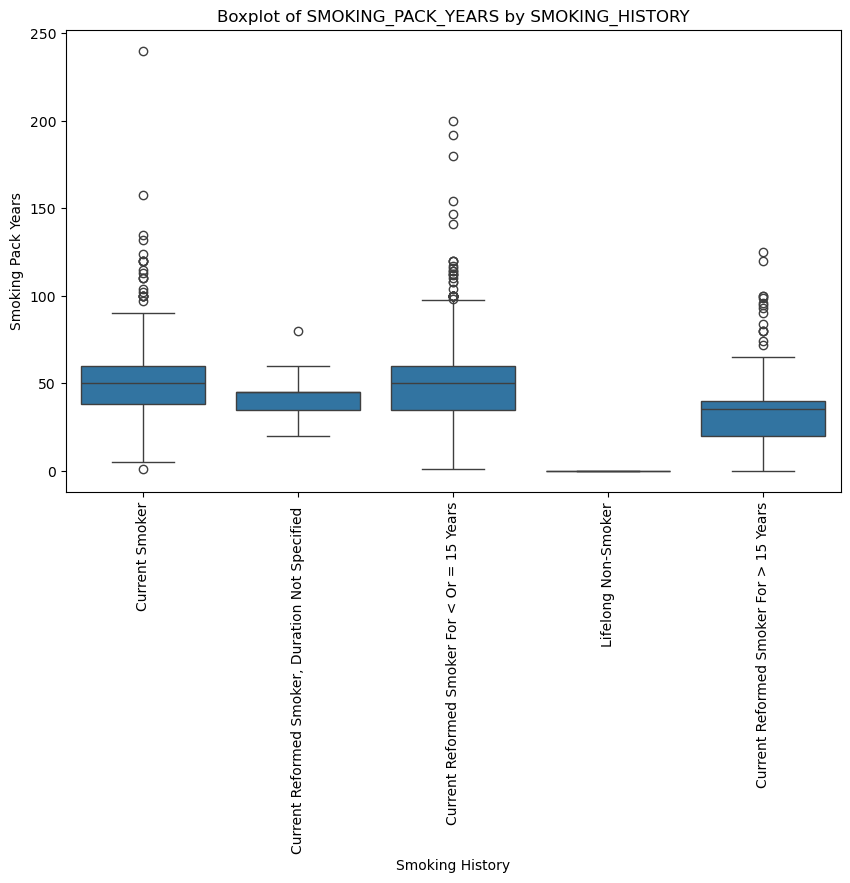

In [58]:
# Melt the one-hot encoded SMOKING_HISTORY columns back into a single categorical column
smoking_history_columns = [col for col in cleaned_data.columns if col.startswith('SMOKING_HISTORY_')]
cleaned_data['SMOKING_HISTORY'] = cleaned_data[smoking_history_columns].idxmax(axis=1).str.replace('SMOKING_HISTORY_', '')

# Generate the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data, x='SMOKING_HISTORY', y='SMOKING_PACK_YEARS')
plt.title('Boxplot of SMOKING_PACK_YEARS by SMOKING_HISTORY')
plt.xlabel('Smoking History')
plt.ylabel('Smoking Pack Years')
plt.xticks(rotation=90)
plt.show()

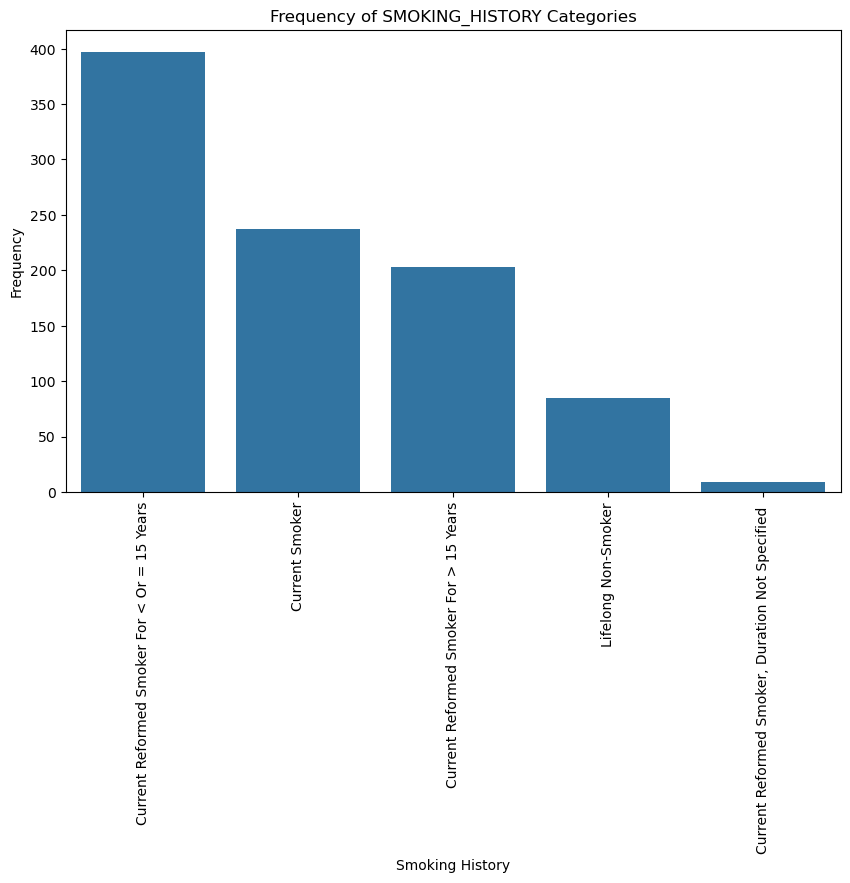

In [59]:
# Melt the one-hot encoded SMOKING_HISTORY columns back into a single categorical column
smoking_history_columns = [col for col in cleaned_data.columns if col.startswith('SMOKING_HISTORY_')]
cleaned_data['SMOKING_HISTORY'] = cleaned_data[smoking_history_columns].idxmax(axis=1).str.replace('SMOKING_HISTORY_', '')

# Generate the barplot
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='SMOKING_HISTORY', order=cleaned_data['SMOKING_HISTORY'].value_counts().index)
plt.title('Frequency of SMOKING_HISTORY Categories')
plt.xlabel('Smoking History')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

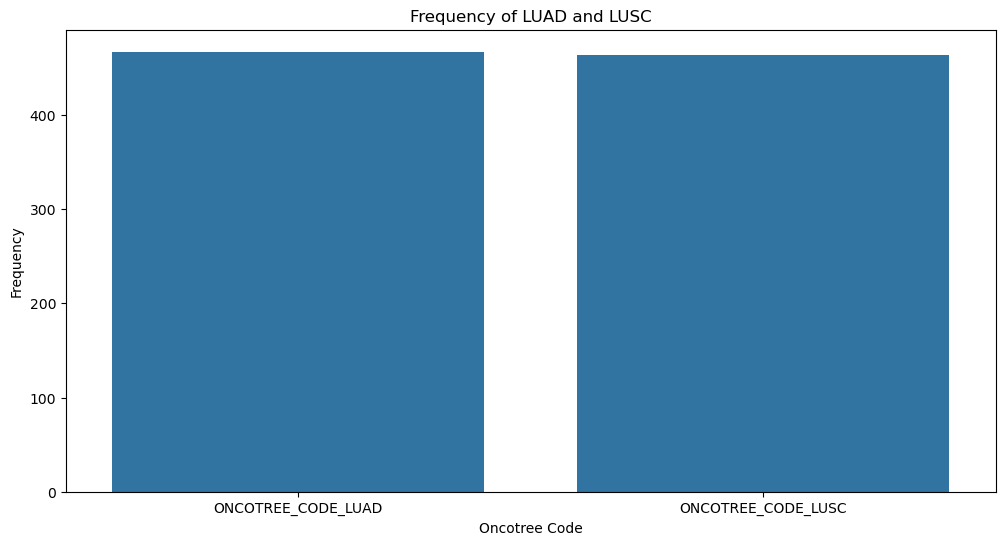

In [60]:
# Identify the ONCOTREE_CODE one-hot encoded columns
oncotree_columns = [col for col in cleaned_data.columns if col.startswith('ONCOTREE_CODE_')]

# Sum the one-hot encoded columns to get frequencies
oncotree_frequencies = cleaned_data[oncotree_columns].sum().sort_values(ascending=False)

# Create a barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=oncotree_frequencies.index, y=oncotree_frequencies.values)
plt.title('Frequency of LUAD and LUSC')
plt.xlabel('Oncotree Code')
plt.ylabel('Frequency')
plt.show()

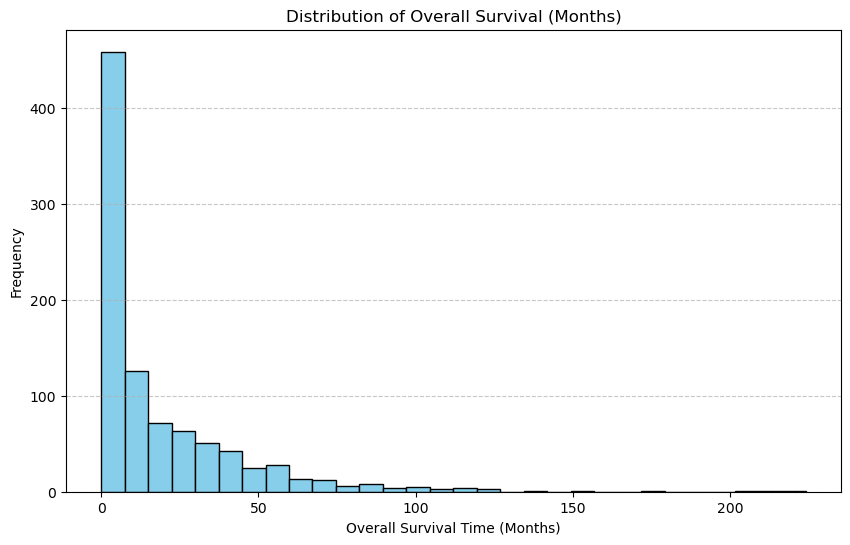

In [61]:
# Generate the histogram for OS_MONTHS
plt.figure(figsize=(10, 6))
plt.hist(cleaned_data['OS_MONTHS'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Overall Survival (Months)')
plt.xlabel('Overall Survival Time (Months)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [62]:
cleaned_data = pd.read_csv("../data/nsclc_tcga_broad_2016/cleaned_feature_and_target_data.csv", index_col = 0)

(990, 990)


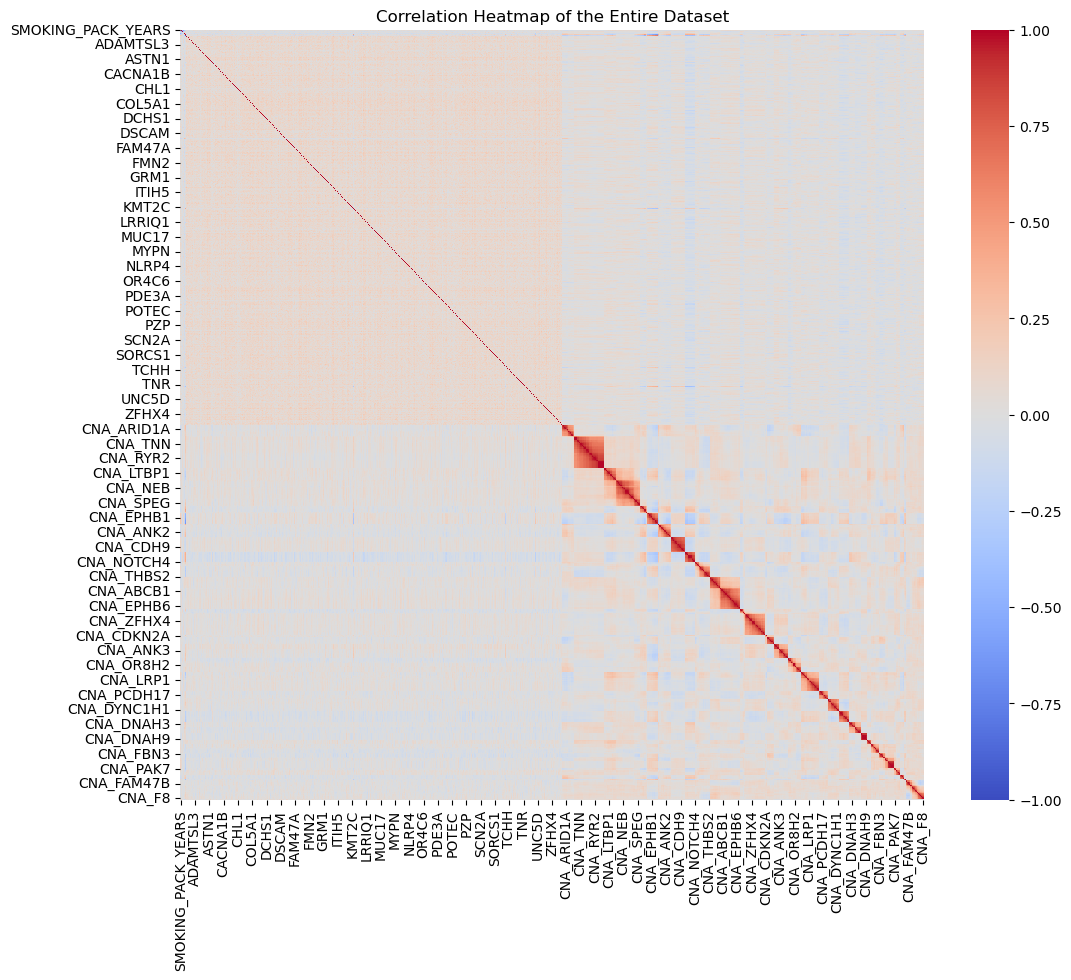

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

def plot_full_correlation_heatmap(cleaned_data):
    """
    Plots a heatmap of the correlation matrix for the entire dataset.

    Parameters:
        cleaned_data (pd.DataFrame): The DataFrame containing the dataset.

    Returns:
        None
    """
    # Select only numeric columns
    #numeric_data = cleaned_data.select_dtypes(include=['number'])

    # Compute the correlation matrix
    correlation_matrix = cleaned_data.corr()
    print(correlation_matrix.shape)

    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
    plt.title('Correlation Heatmap of the Entire Dataset')
    plt.show()

plot_full_correlation_heatmap(cleaned_data)

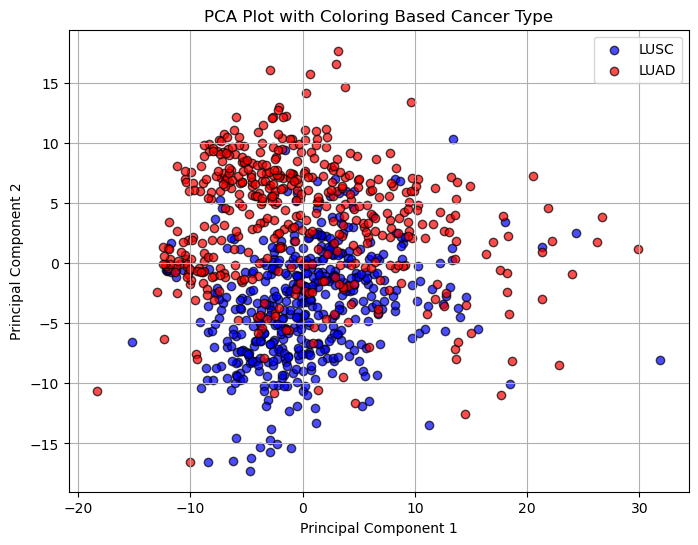

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


def plot_pca(cleaned_data, n_components=2, binary_column='ONCOTREE_CODE_LUAD'):
    """
    Generates a PCA plot for the given dataset with binary coloring based on a specified column.

    Parameters:
        cleaned_data (pd.DataFrame): The DataFrame containing the dataset.
        n_components (int): Number of principal components to compute (default is 2).
        binary_column (str): The column to use for binary coloring (default is 'ONCOTREE_CODE_LUAD').

    Returns:
        None
    """
    # Select only numeric columns
    numeric_data = cleaned_data.select_dtypes(include=['number'])

    # Standardize the data
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(numeric_data)

    # Perform PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(standardized_data)

    # Extract the binary values
    if binary_column not in cleaned_data.columns:
        raise ValueError(f"Column '{binary_column}' not found in the dataset.")
    binary_values = cleaned_data[binary_column]

    colors = binary_values.map({0: 'blue', 1: 'red'})

    plt.figure(figsize=(8, 6))
    for value, color, label in zip([0, 1], ['blue', 'red'], ['LUSC', 'LUAD']):
        plt.scatter(
            pca_result[binary_values == value, 0], 
            pca_result[binary_values == value, 1],
            c=color, label=label, alpha=0.7, edgecolor='k'
        )
    plt.title('PCA Plot with Coloring Based Cancer Type')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_pca(cleaned_data, binary_column='ONCOTREE_CODE_LUAD')